# GRIP  : The Sparks Foundation

## Data Science and Buisness Analytics intern - August2021

## Author : Zeenat Shaikh

## Task 1 : Prediction Using Supervised ML

#### In this task we have to predict the percentage score of a student based on the number of hours studied. The task has two variables where the feature is the no. of hours studied and the target value is the percentage score. This can be solved using simple linear regression

#### Step 1: Importing Python library

In [1]:
# Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Reading data-set from this given Link

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

#### Step 3: Checking whether data is available or not

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Step 4: Exploring Data 

In [4]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Step 5 : Plot the Graph 📊, for detail Analysis of Data-set

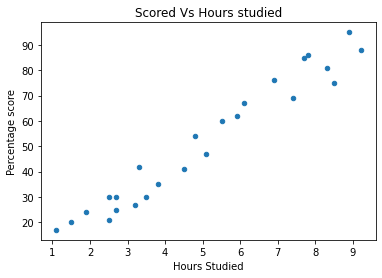

In [8]:
# Plotting the distribution of scores and hours studied by student
data.plot(kind='scatter', x='Hours', y='Scores', style='o');
plt.title('Scored Vs Hours studied')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.show()

<AxesSubplot:xlabel='Hours'>

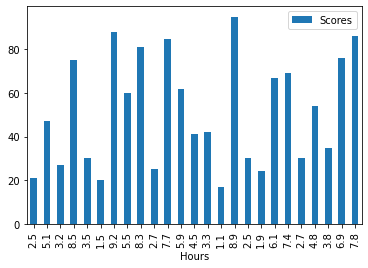

In [9]:
data.plot.bar(x='Hours', y='Scores')

#### In the above graph, we can see that there is a positive linear relation between the number of hours studied and percentage score of student

In [10]:
# Lets check correlation
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:xlabel='Hours'>

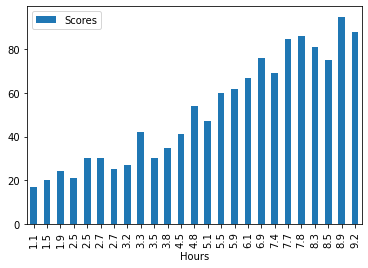

In [11]:
data.sort_values(["Hours"], axis=0,
                ascending=[True], inplace=True)
data.head(10)
data.plot.bar(x='Hours', y='Scores')

#### Splitting the data

#### Step 6: Now, we have prepared the data for our model This step is to divide the data into "attributes" (inputs) and "labels"(outputs).

In [12]:
# Defining X and y from the Data
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [13]:
x

array([[1.1],
       [1.5],
       [1.9],
       [2.5],
       [2.5],
       [2.7],
       [2.7],
       [3.2],
       [3.3],
       [3.5],
       [3.8],
       [4.5],
       [4.8],
       [5.1],
       [5.5],
       [5.9],
       [6.1],
       [6.9],
       [7.4],
       [7.7],
       [7.8],
       [8.3],
       [8.5],
       [8.9],
       [9.2]])

In [14]:
y

array([17, 20, 24, 21, 30, 30, 25, 27, 42, 30, 35, 41, 54, 47, 60, 62, 67,
       76, 69, 85, 86, 81, 75, 95, 88], dtype=int64)

#### Step 7: Now, we have divide the data for training  & testing the model

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Training the linear regression model

In [16]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training complete.")

Training complete.


#### Step 8: Now our model is ready. its time to test it.

In [17]:
# predicting the results
print(y_test)
print("Prediction of Score")
y_pred = regressor.predict(x_test)
print(y_pred)

[30 24 85 67 41]
Prediction of Score
[28.6177145  20.88803334 76.92822173 61.46885942 46.0094971 ]


#### Plotting the regression line

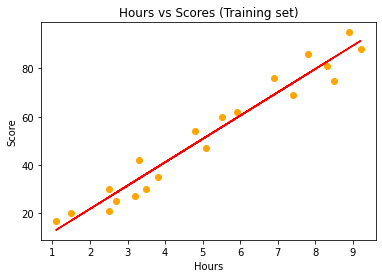

In [18]:
# Visualizing the training set result
# Plotting for the test data plt.scatter(x, y)
plt.scatter(x_train,y_train, color = 'orange')
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

#### Making predictions

In [19]:
# In Hours
print(x_test) 
# Predicting scores
y_pred = regressor.predict(x_test)

[[2.7]
 [1.9]
 [7.7]
 [6.1]
 [4.5]]


#### Step 9: Now, Checking the accuracy of our model 

In [20]:
data_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data_1

,Actual,Predicted
0,30,28.617714
1,24,20.888033
2,85,76.928222
3,67,61.468859
4,41,46.009497


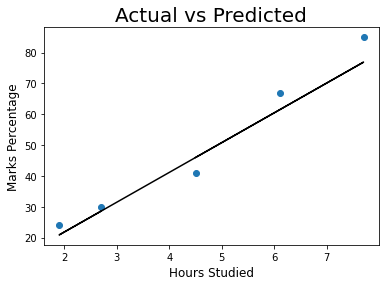

In [21]:
plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#### Step 10: Now, Its time to prediction with custom input

In [22]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 91.904


#### Evaluating the model 

In [23]:
# Calculating the accuracy of the model
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ',mean_absolute_error(y_test, y_pred))

Mean absolute error:  4.621333622532769


#### Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very minimum

#### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.